# **Logistic Regression**

Logistic Regression is a supervised learning algorithm that is commnly used for binary classification problems. It uses a sigmoid function (S-shaped curve) to squash the linear combination of inputs and weights into probabilities, ie, between 0 and 1 so that we can use it to predict whether a given input is 1 (yes) or 0 (no).

Linear Combination of weights and inputs are given by:

$$
z = X_1W_1 + X_2W_2 + \ldots + X_nW_n
$$

ie,

$$
z = \sum_{i=1}^{n} X_i \cdot W_i
$$

## **1. Sigmoid Function**

A Sigmoid Function is also called Logistic Function of S shaped function. As the name says, As the name says, it looks like an S-shaped curve when plotted on a graph. The Sigmoid Function is able to squash the inputs into a range between 0 and 1 making the inputs probabilites.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

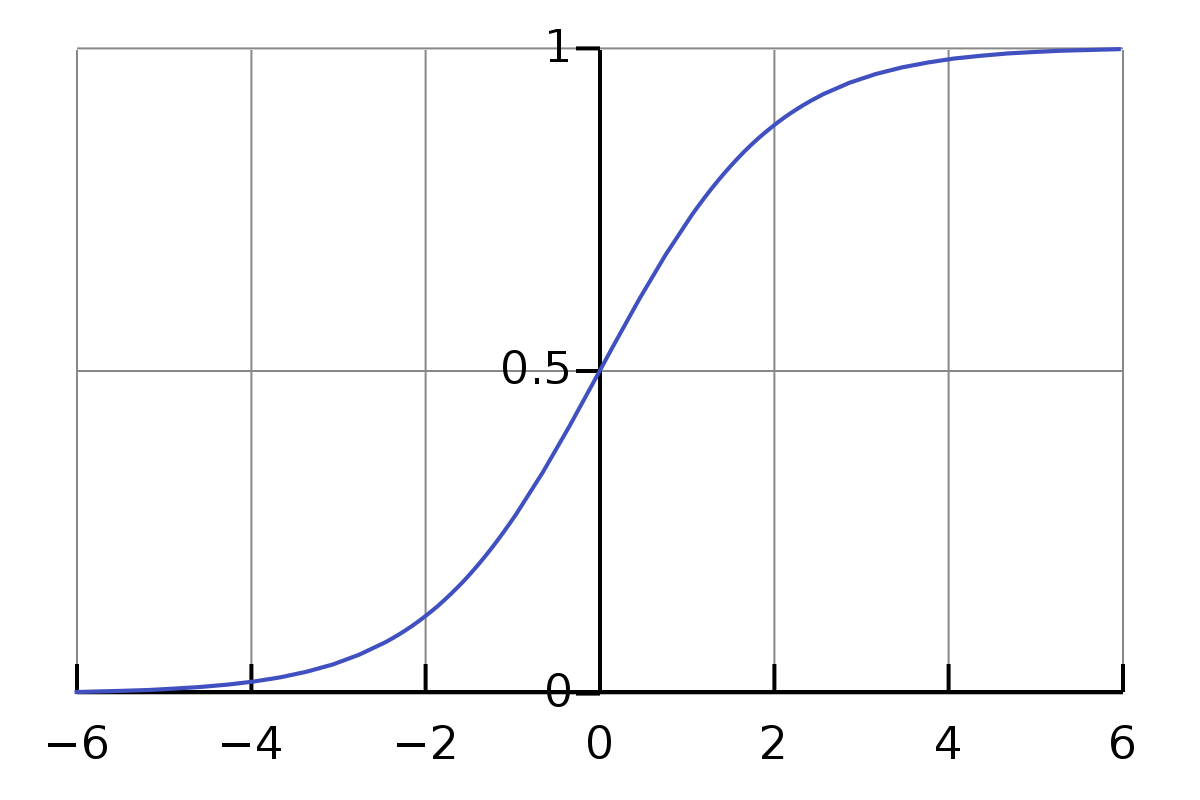

The output of Logistic Model will give you the probability of output to be True or False,

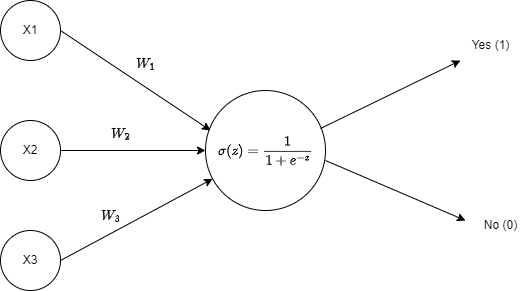


## **How Logistic Regression Learns?**

Logistic Regression can learn with the optimization techniques like Gradient Descent to find the best weights. Gradient Descent is an optimzation technique where we use the gradient of errors and use it to optimize the weights. In the case of Logistic Regression, as inputs has more weights, more scores will produce, and the bigger the scores, the bigger the probability.

### **Loss Function**
$$
\text{Loss}(\mathbf{y}, \hat{\mathbf{y}}) = -(\mathbf{y} \log(\hat{\mathbf{y}}) + (1 - \mathbf{y}) \log(1 - \hat{\mathbf{y}}))
$$

### **Gradient of the Loss with respect to y^**
$$
\frac{\partial \text{Loss}}{\partial \hat{\mathbf{y}}} = -\left(\frac{\mathbf{y}}{\hat{\mathbf{y}}} - \frac{1 - \mathbf{y}}{1 - \hat{\mathbf{y}}}\right)
$$

### **Gradient of y^ with respect to z**
$$
\frac{\partial \hat{\mathbf{y}}}{\partial \mathbf{z}} = \hat{\mathbf{y}} \cdot (1 - \hat{\mathbf{y}})
$$

### **Gradient of the Loss with respect to z**
$$
\frac{\partial \text{Loss}}{\partial \mathbf{z}} = (\hat{\mathbf{y}} - \mathbf{y})
$$

### **Gradient of the Loss with respect to weights**
$$
\frac{\partial \text{Loss}}{\partial \mathbf{Weights}} = \frac{1}{m} \mathbf{X}^T \cdot (\hat{\mathbf{y}} - \mathbf{y})
$$

### **Update Step in Gradient Descent**
$$
\mathbf{Weights} = \mathbf{Weights} - \alpha \frac{\partial \text{Loss}}{\partial \mathbf{Weights}}
$$





In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

class LogisticRegression:

    def __init__(self, learning_rate = 0.01, num_epochs = 10000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15  # Small constant to avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])

        for epoch in range(self.num_epochs):
            predictions = self.sigmoid(np.dot(X, self.weights))
            error = y - predictions
            gradient = np.dot(X.T, error) / len(X)
            self.weights += self.learning_rate * gradient

            if epoch % 100 == 0:
                loss = self.cross_entropy_loss(y, predictions)
                print(f"Epoch: {epoch}, Loss: {loss}")

    def predict(self, X):
        predictions = self.sigmoid(np.dot(X, self.weights))
        return np.round(predictions)

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights))

    def weights_(self):
        return self.weights

In [ ]:
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=5, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

Epoch: 0, Loss: 0.6931471805599452
Epoch: 100, Loss: 0.5324898677094614
Epoch: 200, Loss: 0.4500149697713806
Epoch: 300, Loss: 0.40196055148872467
Epoch: 400, Loss: 0.37098560858036306
Epoch: 500, Loss: 0.34952233418270195
Epoch: 600, Loss: 0.3338502029441301
Epoch: 700, Loss: 0.3219503381850849
Epoch: 800, Loss: 0.3126388010785884
Epoch: 900, Loss: 0.30517739992464776
Epoch: 1000, Loss: 0.29908267477417605
Epoch: 1100, Loss: 0.2940250374801169
Epoch: 1200, Loss: 0.2897722028035571
Epoch: 1300, Loss: 0.28615582197350575
Epoch: 1400, Loss: 0.2830509467378299
Epoch: 1500, Loss: 0.2803629225463158
Epoch: 1600, Loss: 0.2780187568952084
Epoch: 1700, Loss: 0.27596127751835015
Epoch: 1800, Loss: 0.2741450827944681
Epoch: 1900, Loss: 0.2725336743719602
Epoch: 2000, Loss: 0.27109738817914936
Epoch: 2100, Loss: 0.26981187605052986
Epoch: 2200, Loss: 0.2686569743262161
Epoch: 2300, Loss: 0.26761584909185065
Epoch: 2400, Loss: 0.26667434226693637
Epoch: 2500, Loss: 0.2658204655849286
Epoch: 2600, 

In [ ]:
predictions = lg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(predictions, y_test))

Accuracy: 0.895


In [ ]:
lg.weights

array([4.58596182e-02, 1.23262783e-03, 1.00723630e-01, 1.11165626e-01,
       3.13469901e+00])

In [ ]:
lg.predict_proba(X_test[0])

0.05493692960118718

In [ ]:
X_test[0]

array([ 0.80782115,  1.443632  , -1.25650689, -0.49312282, -0.86212853])